In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the city and ride data files and store them in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
# Get the columns and the rows that are not null.
ride_data_df.count()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [9]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
# Create the Urban Suburban and Rural city DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [11]:
# Calculate the total number of rides for each city by city type
urban_ride_count = urban_cities_df["city"].value_counts()

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [12]:
# Calculate the average fare for each city by city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [13]:
# Calculate the average number of drivers for each city by city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

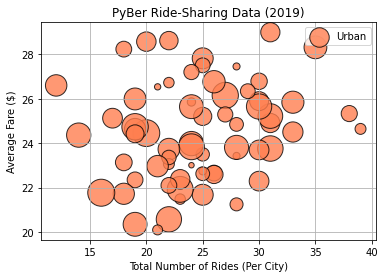

In [14]:
# Create urban scatter plot
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=.8,
            label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

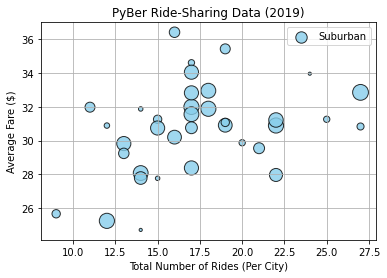

In [15]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

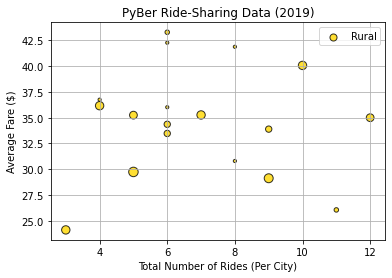

In [16]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

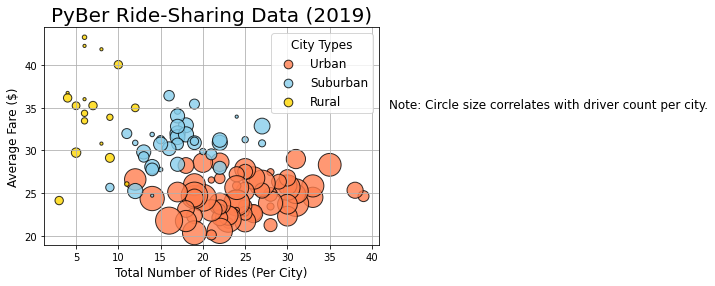

In [17]:
# Add the scatter charts for each type of city.
# Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=.8,
            label="Urban")
# Suburban
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, 
      c="skyblue",
      edgecolor="black", 
      linewidths=1,
      alpha=0.8, 
      label="Suburban")

# Rurual
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, 
      c="gold",
      edgecolor="black", 
      linewidths=1,
      alpha=0.8, 
      label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
#plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap=True)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", ha="left", wrap=True, fontsize="12")
# Add the legend.
#plt.legend()

#Save the figure
plt.savefig("analysis/Fig1.png", dpi=200, bbox_inches="tight")

# Show the plot
plt.show()



In [18]:
# Get the summary stats
urban_cities_df.describe()



,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [19]:
# Ride count summary stats
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [20]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [21]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [22]:
# Calculate the mode of the ride count for the urban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [23]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count  = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [24]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [25]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [26]:
# Get the driver count data from the city types.
urban_drivers = urban_cities_df['driver_count']

suburban_drivers = suburban_cities_df['driver_count']

rural_drivers = rural_cities_df['driver_count']


In [27]:
# Calculate the measures of central tendency for the average fare for the subsurban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban cities is  {mode_suburban_drivers}.")

The mean number of drivers for suburban cities is $13.71.
The median number of drivers for suburban cities is $16.00.
The mode number of drivers for suburban cities is  ModeResult(mode=array([20], dtype=int64), count=array([79])).


# Box and whiskers - Ride Counts

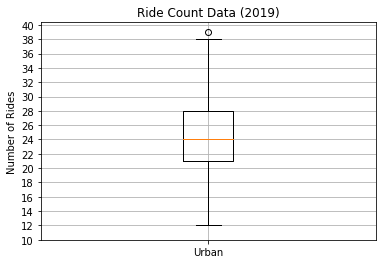

In [28]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

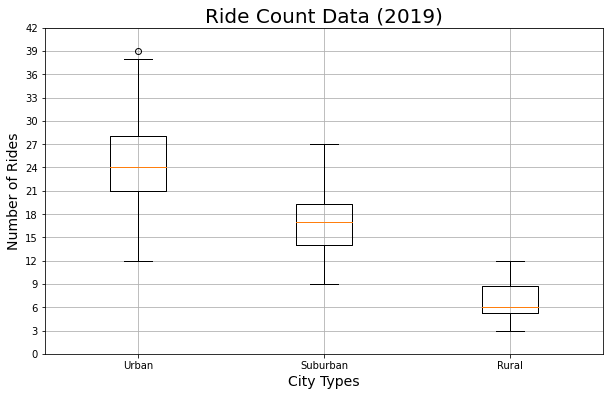

In [29]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png",bbox_inches="tight")
plt.show()

In [30]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


# Box and whiskers - Driver Counts

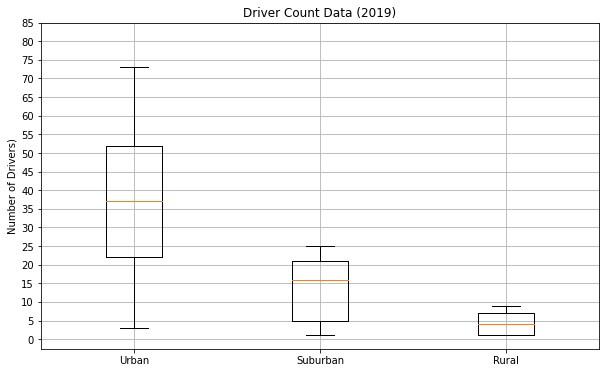

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [31]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("analysis/Driver_Count_BW.png", bbox_inches="tight")
plt.show()
print("Summary Statistics")
urban_drivers.describe()

# Get the Percentage of Fares for Each City Type and crate pie chart 5.5


In [32]:
# Get the sum of the fares for each city type.

sum_fares_by_type  = pyber_data_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [33]:
# Get the sum of all the fares.
total_fares = pyber_data_df.fare.sum()
total_fares

63538.64

In [34]:
# Calculate the percentage of fare for each city type.
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [35]:
# Calculate the percentage of fare for each city type in ONE step
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

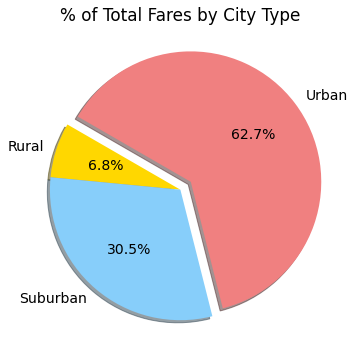

In [38]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"]
        ,colors=["gold","lightskyblue","lightcoral"]
        ,explode=[0,0,.1]
        ,autopct='%1.1f%%'
        ,shadow=True 
        ,startangle=150
       )
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#Save Figure
plt.savefig("analysis/Total_Fares_Pie.png")
#Show Figure
plt.show()

In [46]:
ride_percents = pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count() * 100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

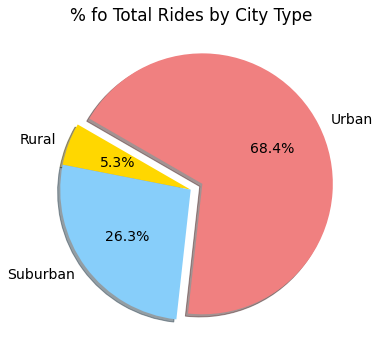

In [75]:
# Create the pie chart 
plt.subplots(figsize=(10,6))
mpl.rcParams['font.size'] = 14
plt.pie(ride_percents
       ,labels=["Rural","Suburban","Urban"]
       ,colors=["gold","lightskyblue","lightcoral"]
       ,explode=[0,0,.1]
       ,autopct='%1.1f%%'
       ,shadow=True
       ,startangle=150)

plt.title("% fo Total Rides by City Type")

plt.savefig("analysis/Total_Rides_Pie.png")

plt.show()